# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
#brain_name = env.brain_names[0]
#brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
#env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
#num_agents = len(env_info.agents)
#print('Number of agents:', num_agents)

# size of each action
#action_size = brain.vector_action_space_size
#print('Size of each action:', action_size)

# examine the state space 
#states = env_info.vector_observations
#state_size = states.shape[1]
#print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
#print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
#for i in range(5):                                         # play game for 5 episodes
#    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#    states = env_info.vector_observations                  # get the current state (for each agent)
#    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#    while True:
#        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#        next_states = env_info.vector_observations         # get next state (for each agent)
#        rewards = env_info.rewards                         # get reward (for each agent)
#        dones = env_info.local_done                        # see if episode finished
#        scores += env_info.rewards                         # update the score (for each agent)
#        states = next_states                               # roll over states to next time step
#        if np.any(dones):                                  # exit loop if episode finished
#            break
#    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [3]:
import numpy as np 
import torch 
import random
from collections import deque
#from TD3.td3_agent import Agent
import matplotlib.pyplot as plt
from DDPG.ddpg_agent import Agent

#def td3(env):
#    """ Twin Delayed Deep Deterministic Policy Gradients """
def ddpg(env):
    # Number of episodes of agent-environment interactions
    n_episodes=4000 
    # Number of timesteps per episode
    max_t = 1000
    
    flag = False # When environment is technically solved
    
     # get the default brain
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    
    env_info = env.reset(train_mode=True)[brain_name]
    
    # number of agents
    num_agents = len(env_info.agents)
    print('Number of agents:', num_agents)
    
    # number of actions
    action_size = brain.vector_action_space_size
    print('Number of actions:', action_size)
    
    # examine the state space 
    states = env_info.vector_observations
    state_size = states.shape[1]
    print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
    #print('The state for the first agent looks like:', states[0])
    
    agent = Agent(state_size, action_size, random_seed=2)

    # list containing scores from each episodes    
    scores = [] 
    # last 100 scores
    scores_window = deque(maxlen=100)
    
    for i_episode in range(1, n_episodes + 1):
        
        #reset average max score
        average_score = 0
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
                
       # get the current state (for each agent)
        states = env_info.vector_observations

        # initialize the score (for each agent)
        scores_agents = np.zeros(num_agents)
        score = 0
        
        for t in range(max_t):
            # choose actions
            actions = agent.act(states)
            
            # send the actions to the environment            
            env_info = env.step(actions)[brain_name]
           
            # get the next state
            next_states = env_info.vector_observations
    
            # get the rewards
            rewards = env_info.rewards
            
            # see if episode has finished
            dones = env_info.local_done
            
            # step 
            # agents performs internal updates based on sampled experience
            agent.step(states, actions, rewards, next_states, dones)
            
            # accumulate rewards into score variable
            scores_agents += rewards
            
            # get next_states and set it to states
            states = next_states
                   
            if np.any(dones): 
                break

        # save most recent scores (max amongst the agents)
        score = (np.max(scores_agents))
        scores_window.append(score)
        average_score = np.mean(scores_window)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, average_score), end="")
        
        if (i_episode % 100 == 0):
            print("\rEpisode {}\tAverage Score: {:.3f}".format(i_episode, \
                                                              average_score))
               
        # Check if envionment solved 
        if not flag:
            if (average_score >= 0.5):
                print("\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}".format(
                i_episode, average_score))
                # Save solved models 
                agent.save_models()   
                flag = True
                
                break
                
    return scores

from utils.workspace_utils import active_session 
with active_session():
#    scores = td3(env)
    scores = ddpg(env)



Number of agents: 2
Number of actions: 2
There are 2 agents. Each observes a state with length: 24
Episode 100	Average Score: 0.004
Episode 200	Average Score: 0.009
Episode 300	Average Score: 0.016
Episode 400	Average Score: 0.026
Episode 500	Average Score: 0.064
Episode 600	Average Score: 0.091
Episode 700	Average Score: 0.160
Episode 800	Average Score: 0.215
Episode 900	Average Score: 0.256
Episode 1000	Average Score: 0.245
Episode 1100	Average Score: 0.207
Episode 1200	Average Score: 0.261
Episode 1300	Average Score: 0.240
Episode 1400	Average Score: 0.305
Episode 1500	Average Score: 0.422
Episode 1600	Average Score: 0.309
Episode 1700	Average Score: 0.455
Episode 1750	Average Score: 0.503
Environment solved in 1750 episodes!	Average Score: 0.503


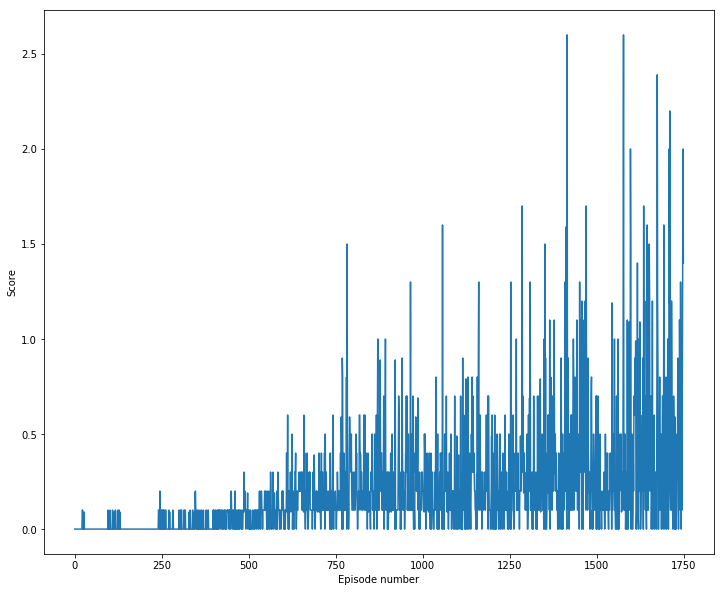

In [4]:

# plot the scores
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.xlabel('Episode number')
plt.ylabel('Score')
plt.show()



In [ ]:
env.close()